# `MNIST`数据加载


In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='D:\\code\workspace-self\\tensorflow-pg\\data\\mnist\\mnist.npz')

D:\programs\conda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
Using TensorFlow backend.


In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# 数据规范化


In [4]:
# 将图像本身从[28,28]装换为[784,]
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))


(60000, 784) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>


In [5]:
# 将数据类型转化为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 归一化
X_train /= 255
X_test /= 255


# 统计训练数据中各标签的数量


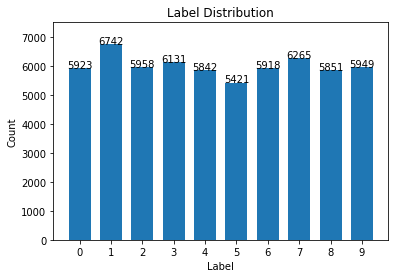

In [8]:
import numpy as np
import matplotlib.pyplot as plt

label, count = np.unique(y_train, return_counts=True)

fig = plt.figure()
plt.bar(label, count, width=0.7, align='center')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(label)
plt.ylim(0, 7500)

for a, b in zip(label, count):
    plt.text(a, b, "%d"%b, ha='center', fontsize=10)
plt.show(fig)


# 数据处理： one-hot

几种编码方式对比

| Binary | Gray code | one hot  |
| ------ | --------- | -------- |
| 000    | 000       | 00000001 |
| 001    | 001       | 00000010 |
| 010    | 011       | 00000100 |
| 011    | 010       | 00001000 |
| 100    | 110       | 00010000 |
| 101    | 111       | 00100000 |
| 110    | 101       | 01000000 |
| 111    | 100       | 10000000 |


In [9]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n_classes)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# 使用`Keras sequential model`定义`softmax`网络层


In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


# 编译模型


In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


# 训练模型，将指标保存到history



In [12]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 7s - loss: 0.2154 - acc: 0.9352 - val_loss: 0.0999 - val_acc: 0.9683
Epoch 2/5
 - 7s - loss: 0.0795 - acc: 0.9757 - val_loss: 0.0751 - val_acc: 0.9778
Epoch 3/5
 - 7s - loss: 0.0523 - acc: 0.9836 - val_loss: 0.0720 - val_acc: 0.9781
Epoch 4/5
 - 8s - loss: 0.0361 - acc: 0.9880 - val_loss: 0.0840 - val_acc: 0.9748
Epoch 5/5
 - 8s - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0705 - val_acc: 0.9788


# 可视化训练过程


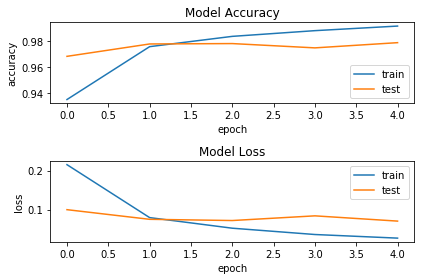

In [13]:
fig2 = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()


# 保存模型

`model.save()`: save model to single **HDF5**, can use load_model to reinstantiate model


In [14]:
import os 
from tensorflow import gfile

save_dir = "D:\\code\\workspace-self\\tensorflow-pg\\out\\minist"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

print("Saved trained model as %s" % model_path)



Saved trained model as D:\code\workspace-self\tensorflow-pg\out\minist\keras_mnist.h5


# 加载模型


In [15]:
from keras.models import load_model
mnist_model = load_model(model_path)

loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}".format(loss_and_metrics[1] * 100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.count_nonzero(predicted_classes == y_test)
incorrect_indices = np.count_nonzero(predicted_classes != y_test)
print("classified correctly count : {}".format(correct_indices))
print("classified incorrectly count : {}".format(incorrect_indices))

Test Loss: 0.07051058908833074
Test Accuracy: 97.88
classified correctly count : 9788
classified incorrectly count : 212
